In [3]:
import simpy
import numpy as np

STUDENT_NR_MAURITS = 14014777
STUDENT_NR_HARSHITA = 13807609

SEED = STUDENT_NR_MAURITS + STUDENT_NR_HARSHITA
import random
import matplotlib.pyplot as plt

In [10]:
num_sim = 200
T_threshold = 720 # 12 hours
random.seed(SEED)
num_servers = [1,2,4]

rho = 0.4
mu = 15      # per minute
lambd = [25/4,25/2,25]


In [19]:
print(25/(4*mu))

0.4166666666666667


# Average waiting time for 1,2 and 4 servers with the same load

In [12]:
# Distribution of mu(service rate)

# simpy works in minutes(lambda - number of arrivals per minute or appropriate change it in hours)
# Here system is a shop
# Agent is - Customer
# Process - serving
# resource - cashier/shopkeeper
class System(object):
    def __init__(self,env,num_servers,lambda_a,mu,service_distribution):
        self.env = env
        self.server = simpy.Resource(env,capacity = num_servers)
        self.n = 0    # Total customers inside the shop
        self.lambd = lambda_a
        self.mu = mu
        self.serDist = service_distribution
        self.waitTimes = []
        self.actual_wait = []
        self.customer = []
        
    
def customer(env,system):
    arrival_time = env.now
    #if()
    service_time = np.random.exponential(scale=1/system.mu)
    
    with system.server.request() as request_server:
        yield request_server
        
        waiting_time = env.now - arrival_time
        system.actual_wait.append(waiting_time)
   
        # Starts billing at the counter
        #print('starting to serve the customer at %s' % (env.now))
        yield env.timeout(service_time)
        #print('Customer has purchades goods and is leaving the store at %s' % (env.now))
            
    response_time = env.now - arrival_time
    system.waitTimes.append(response_time)
    #system.n  = system.n - 1
    #system.customer.append(system.n)
    
def generate(env,system):
    # shop opens at time 9:00 AM so time t = 0 and closes at 9:00 PM so T = 12
    while(env.now <= T_threshold):
        # First customer not arriving at time t = 0 but at inter_arrival time
        inter_arrival = np.random.exponential(scale=1/system.lambd)
        yield env.timeout(inter_arrival)
        env.process(customer(env,system))
        system.n += 1
        #system.customer.append(system.n)
        
def get_average_wait_time(wait_times):
    average_wait_time = np.mean(wait_times)
    return average_wait_time

q_length = []
def observe(env,system):
    while(env.now < T_threshold):
        q_length.append(len(system.server.queue))
        #print(len(system.server.queue))
        yield env.timeout(1.0)
        
        
        

service_distribution = "exponential"
avg_time = []


for i in range(len(num_servers)):
    for sim in range(num_sim):
        # Run the simulation
        env = simpy.Environment()
        system = System(env,num_servers[i],lambd[i],mu,service_distribution)
        env.process(generate(env,system))
        env.process(observe(env,system))
        env.run()
        avg_time.append(get_average_wait_time(system.actual_wait))
    #num_customers.append(system.n)
    print(num_servers[i])
    print(np.mean(avg_time))
    print('\n')
    
    

1
0.047341630931859086


2
0.030644490237042774


4
0.021410915820267294




# load of 0.66

In [20]:
num_sim = 200
T_threshold = 720 # 12 hours
random.seed(SEED)
num_servers = [1,2,4]

rho = 0.4
mu = 15      # per minute
lambd = [40/4,40/2,40]

print(40/(4*mu))

0.6666666666666666


In [21]:
# Distribution of mu(service rate)

# simpy works in minutes(lambda - number of arrivals per minute or appropriate change it in hours)
# Here system is a shop
# Agent is - Customer
# Process - serving
# resource - cashier/shopkeeper
class System(object):
    def __init__(self,env,num_servers,lambda_a,mu,service_distribution):
        self.env = env
        self.server = simpy.Resource(env,capacity = num_servers)
        self.n = 0    # Total customers inside the shop
        self.lambd = lambda_a
        self.mu = mu
        self.serDist = service_distribution
        self.waitTimes = []
        self.actual_wait = []
        self.customer = []
        
    
def customer(env,system):
    arrival_time = env.now
    #if()
    service_time = np.random.exponential(scale=1/system.mu)
    
    with system.server.request() as request_server:
        yield request_server
        
        waiting_time = env.now - arrival_time
        system.actual_wait.append(waiting_time)
   
        # Starts billing at the counter
        #print('starting to serve the customer at %s' % (env.now))
        yield env.timeout(service_time)
        #print('Customer has purchades goods and is leaving the store at %s' % (env.now))
            
    response_time = env.now - arrival_time
    system.waitTimes.append(response_time)
    #system.n  = system.n - 1
    #system.customer.append(system.n)
    
def generate(env,system):
    # shop opens at time 9:00 AM so time t = 0 and closes at 9:00 PM so T = 12
    while(env.now <= T_threshold):
        # First customer not arriving at time t = 0 but at inter_arrival time
        inter_arrival = np.random.exponential(scale=1/system.lambd)
        yield env.timeout(inter_arrival)
        env.process(customer(env,system))
        system.n += 1
        #system.customer.append(system.n)
        
def get_average_wait_time(wait_times):
    average_wait_time = np.mean(wait_times)
    return average_wait_time

q_length = []
def observe(env,system):
    while(env.now < T_threshold):
        q_length.append(len(system.server.queue))
        #print(len(system.server.queue))
        yield env.timeout(1.0)
        
        
        

service_distribution = "exponential"
avg_time = []


for i in range(len(num_servers)):
    for sim in range(num_sim):
        # Run the simulation
        env = simpy.Environment()
        system = System(env,num_servers[i],lambd[i],mu,service_distribution)
        env.process(generate(env,system))
        env.process(observe(env,system))
        env.run()
        avg_time.append(get_average_wait_time(system.actual_wait))
    #num_customers.append(system.n)
    print(num_servers[i])
    print(np.mean(avg_time))
    print('\n')
    
    

1
0.13420475493974698


2
0.09384146702155743


4
0.06888423803589734




# Graph of convergence of waiting time with increase in simulation runs(M/M/1)

# Average Response time

In [32]:
num_sim_arr = [10,50,100,200,350,500,800,1000,1200,1500,2000,3000,4000]
T_threshold = 720 # 12 hours
random.seed(SEED)
num_servers = 1

rho = 0.4
mu = 15      # per minute
lambd = 25/4


In [34]:
# Distribution of mu(service rate)

# simpy works in minutes(lambda - number of arrivals per minute or appropriate change it in hours)
# Here system is a shop
# Agent is - Customer
# Process - serving
# resource - cashier/shopkeeper
class System(object):
    def __init__(self,env,num_servers,lambda_a,mu,service_distribution):
        self.env = env
        self.server = simpy.Resource(env,capacity = num_servers)
        self.n = 0    # Total customers inside the shop
        self.lambd = lambda_a
        self.mu = mu
        self.serDist = service_distribution
        self.waitTimes = []
        self.actual_wait = []
        self.customer = []
        
    
def customer(env,system):
    arrival_time = env.now
    #if()
    service_time = np.random.exponential(scale=1/system.mu)
    
    with system.server.request() as request_server:
        yield request_server
        
        waiting_time = env.now - arrival_time
        system.actual_wait.append(waiting_time)
   
        # Starts billing at the counter
        #print('starting to serve the customer at %s' % (env.now))
        yield env.timeout(service_time)
        #print('Customer has purchades goods and is leaving the store at %s' % (env.now))
            
    response_time = env.now - arrival_time
    system.waitTimes.append(response_time)
    #system.n  = system.n - 1
    #system.customer.append(system.n)
    
def generate(env,system):
    # shop opens at time 9:00 AM so time t = 0 and closes at 9:00 PM so T = 12
    while(env.now <= T_threshold):
        # First customer not arriving at time t = 0 but at inter_arrival time
        inter_arrival = np.random.exponential(scale=1/system.lambd)
        yield env.timeout(inter_arrival)
        env.process(customer(env,system))
        system.n += 1
        #system.customer.append(system.n)
        
def get_average_wait_time(wait_times):
    average_wait_time = np.mean(wait_times)
    return average_wait_time

q_length = []
def observe(env,system):
    while(env.now < T_threshold):
        q_length.append(len(system.server.queue))
        #print(len(system.server.queue))
        yield env.timeout(1.0)
        
        
        

service_distribution = "exponential"
avg_time = []
avg_timt_y = []


for num_sim in num_sim_arr:
    for sim in range(num_sim):
        # Run the simulation
        env = simpy.Environment()
        system = System(env,num_servers,lambd,mu,service_distribution)
        env.process(generate(env,system))
        env.process(observe(env,system))
        env.run()
        avg_time.append(get_average_wait_time(system.actual_wait))
    #num_customers.append(system.n)
    avg_timt_y.append(np.mean(avg_time))
    print(num_servers)
    #print(np.mean(avg_time))
    print('\n')
    
    

1


1


1


1


1


1


1


1


1


1


1


1


1




In [35]:
print(avg_timt_y)

[0.04733841807256124, 0.04734163675523396, 0.047673420306026684, 0.04755649672200987, 0.047544711927646276, 0.047464819509879956, 0.047519032362241725, 0.04755488828452877, 0.047527689930453795, 0.047528369020399835, 0.04752339822078653, 0.04755945590805764, 0.04755695892568142]


In [42]:
rho = lambd/mu
print(rho/(mu*(1-rho)))

0.04761904761904763


In [68]:
avg_time_y = [0.04733841807256124, 0.04734163675523396, 0.047673420306026684, 0.04755649672200987, 0.047544711927646276, 0.047464819509879956, 0.047519032362241725, 0.04755488828452877, 0.047527689930453795, 0.047528369020399835, 0.04752339822078653, 0.04755945590805764, 0.04755695892568142]

In [51]:
print(avg_time_y)

[0.04733841807256124, 0.04734163675523396, 0.047673420306026684, 0.04755649672200987, 0.047544711927646276, 0.047464819509879956, 0.047519032362241725, 0.04755488828452877, 0.047527689930453795, 0.047528369020399835, 0.04752339822078653, 0.04755945590805764, 0.04755695892568142]


In [60]:
print(len(avg_time_y))

13


In [69]:
for i in range(len(avg_time_y)) :
    avg_time_y[i] = 60*avg_time_y[i]
print(avg_time_y)

print(0.04761904761904763*60)

[2.8403050843536746, 2.8404982053140375, 2.860405218361601, 2.853389803320592, 2.8526827156587764, 2.8478891705927976, 2.8511419417345034, 2.853293297071726, 2.851661395827228, 2.8517021412239902, 2.8514038932471917, 2.8535673544834586, 2.853417535540885]
2.8571428571428577


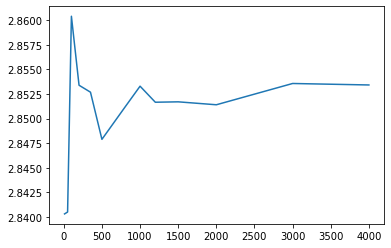

In [65]:
plt.plot(num_sim_arr,avg_time_y)
#plt.yscale("log")

# Probability distribution of mean waiting time 
system more stable with 

Increase in customer number our markov model becomes more stable
(or observe for a longer period of time)

# Confidence Interval

$ \bar{X}_{j+1} = \bar{X}_{j} + \frac{X_{j+1} - \bar{X}_{j}}{j+1} $


$ {S}_{j+1}^{2} = (1-\frac{1}{j})S_{j}^{2}+(j+1)(\bar{X}_{j+1} - \bar{X}_{j})^{2} $

In [ ]:
%%time

num_sim = 100    # number of simulations to run``


avg_timt_y = []
avg_waiting_time = []

def run_simulation():
    env = simpy.Environment()
    system = System(env,num_servers,lambd,mu,service_distribution)
    env.process(generate(env,system))
    env.process(observe(env,system))
    env.run()
    return get_average_wait_time(system.actual_wait)



for sim in range(num_sim):
        avg_wait = run_simulation()
        avg_waiting_time.append(avg_wait)
        
# Estimators - mean and variance(unbiased)
        
prev_estimated_mean = sum(avg_waiting_time)/num_sim
        
mean_difference = 0

for i in range(num_sim):
    mean_difference += (avg_waiting_time[i]-prev_estimated_mean)**2
    
prev_estimated_variance = mean_difference/(num_sim-1)


l = 0.015
z = 1.96
estimated_std_deviation = np.sqrt(prev_estimated_variance)
acceptable_window = 2*z*estimated_std_deviation/np.sqrt(n_sim)
print(acceptable_window)



In [28]:
num_sim = 200
T_threshold = 720 # 12 hours
random.seed(SEED)
num_servers = [1,2,4]

rho = 0.4
mu = 15      # per minute
lambd = [40/4,40/2,40]

print(40/(4*mu))

0.6666666666666666


In [29]:
# Distribution of mu(service rate)

# simpy works in minutes(lambda - number of arrivals per minute or appropriate change it in hours)
# Here system is a shop
# Agent is - Customer
# Process - serving
# resource - cashier/shopkeeper
class System(object):
    def __init__(self,env,num_servers,lambda_a,mu,service_distribution):
        self.env = env
        self.numServer = num_servers
        self.server = simpy.Resource(env,capacity = num_servers)
        self.n = 0    # Total customers inside the shop
        self.lambd = lambda_a
        self.mu = mu
        self.serDist = service_distribution
        self.waitTimes = []
        self.actual_wait = []
        self.customer = []
        
    
def customer(env,system):
    arrival_time = env.now
    #if()
    service_time = np.random.exponential(scale=1/system.mu)
    
    with system.server.request() as request_server:
        yield request_server
        
        waiting_time = env.now - arrival_time
        system.actual_wait.append(waiting_time)
   
        # Starts billing at the counter
        #print('starting to serve the customer at %s' % (env.now))
        yield env.timeout(service_time)
        #print('Customer has purchades goods and is leaving the store at %s' % (env.now))
            
    response_time = env.now - arrival_time
    system.waitTimes.append(response_time)
    system.n  = system.n - 1
    #system.customer.append(system.n)
    
def generate(env,system):
    # shop opens at time 9:00 AM so time t = 0 and closes at 9:00 PM so T = 12
    while(env.now <= T_threshold):
        # First customer not arriving at time t = 0 but at inter_arrival time
        inter_arrival = np.random.exponential(scale=1/system.lambd)
        yield env.timeout(inter_arrival)
        env.process(customer(env,system))
        system.n += 1
        #system.customer.append(system.n)
        
def get_average_wait_time(wait_times):
    average_wait_time = np.mean(wait_times)
    return average_wait_time

q_length = []
resource_utilization_fraction = []
def observe(env,system):
    while(env.now < T_threshold):
        q_length.append(len(system.server.queue))
        if(system.server.count < system.numServer):
            
            resource_utilization_fraction.append(system.server.count/system.numServer)   
        
        else:
            resource_utilization_fraction.append(1)
        #print(len(system.server.queue))
        yield env.timeout(1.0)
        
        
        

service_distribution = "exponential"
avg_response_time = []
avg_utilization = []

for i in range(len(num_servers)):
    for sim in range(num_sim):
        # Run the simulation
        env = simpy.Environment()
        system = System(env,num_servers[i],lambd[i],mu,service_distribution)
        env.process(generate(env,system))
        env.process(observe(env,system))
        env.run()
        avg_response_time.append(get_average_wait_time(system.waitTimes))
        avg_utilization.append(get_average_wait_time(resource_utilization_fraction))
        
    #num_customers.append(system.n)
    print(num_servers[i])
    print(np.mean(avg_response_time))
    print(np.mean(avg_utilization))
    print('\n')
    
    

1
0.20063634670643457
0.6675345342989139


2
0.1602202152809511
0.6674283842722035


4
0.13533865655957542
0.6670094846805381




In [16]:
for i in range(len(lambd)):
    print(rho/((1-rho)*lambd[i]))

0.10666666666666667
0.05333333333333334
0.02666666666666667


In [ ]:
for sim in range(num_sim):
    # Run the simulation
    env = simpy.Environment()
    system = System(env, num_servers_single, lambda_a_single,mu,service_distribution)
    env.process(generate(env,system))
    env.run()
    avg_time.append(get_average_wait_time(system.waitTimes))
    #num_customers.append(system.n)
    
print(np.mean(avg_time))
#print(num_customers)

In [46]:
cust = []

for sim in range(num_sim):
    # Run the simulation
    env = simpy.Environment()
    system = System(env, num_servers_single, lambda_a_single,mu,service_distribution)
    env.process(generate(env,system))
    env.run()
    cust.append(get_average_wait_time(system.customer))
    #num_customers.append(system.n)
    
print(np.mean(cust))
#print(num_customers)

0.9992988229424623


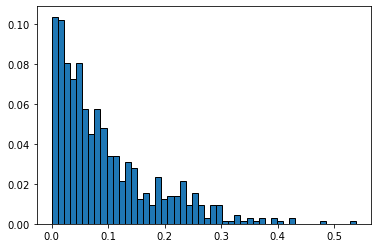

0
1.0069551777434311
0.49999999999999994
0


In [42]:
rho = lambda_a_single/(mu)
env = simpy.Environment()
system = System(env, num_servers_single, lambda_a_single,mu,service_distribution)
env.process(generate(env,system))
env.run()
weights = np.ones_like(system.waitTimes) / len(system.waitTimes)
plt.hist(system.waitTimes,weights=weights, bins= 50, edgecolor='black')
plt.show()

print(system.n)
print(get_average_wait_time(system.customer))
print(rho/(1-rho))
print(system.n)

# response time follows exponential distribution


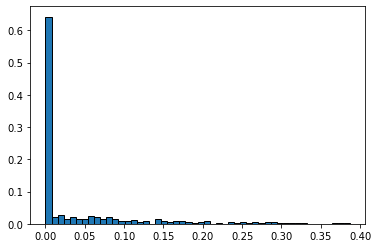

In [33]:
env = simpy.Environment()
system = System(env, num_servers_single, lambda_a_single,mu,service_distribution)
env.process(generate(env,system))
env.run()
weights = np.ones_like(system.actual_wait) / len(system.actual_wait)
plt.hist(system.actual_wait,weights=weights, bins= 50, edgecolor='black')
plt.show()

# doesn't follow exponential distribution

In [4]:
0.008571522311735998
0.03307090256445418


0.07483901532100676
0.1001360999041171







0.5


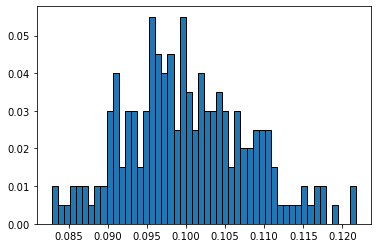

In [28]:
weights = np.ones_like(avg_time) / len(avg_time)
plt.hist(avg_time,weights=weights, bins= 50, edgecolor='black')
plt.show()

# mean waiting time probability distribution graph for different N and different different number of servers - FIFO,determinitis,shortest time
# different load -  different waiting times
# same load, different serevrs waiting time 

In [30]:
from scipy import stats
k2, p = stats.normaltest(avg_time)
alpha = 1e-3
print(p)
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
    
print(100*(1-alpha))

0.21033763215191809
The null hypothesis cannot be rejected
99.9


In [ ]:
# If not enough workers/servers then high wait time

# Black friday - High lambda 
Resource allocation should be proper - need to appoint more workers 
# less Lambda - idle servers ? 


# Vary lambda, mu , num_servers to see how the system behaves

In [ ]:
Simulation is all about creating a virtual environment to reflect a real-world system